<a href = "https://www.canva.com/design/DAFjwPVO1GE/EHFlU93bJ2vMCd3HwXwRow/view?utm_content=DAFjwPVO1GE&utm_campaign=designshare&utm_medium=link&utm_source=publishsharelink">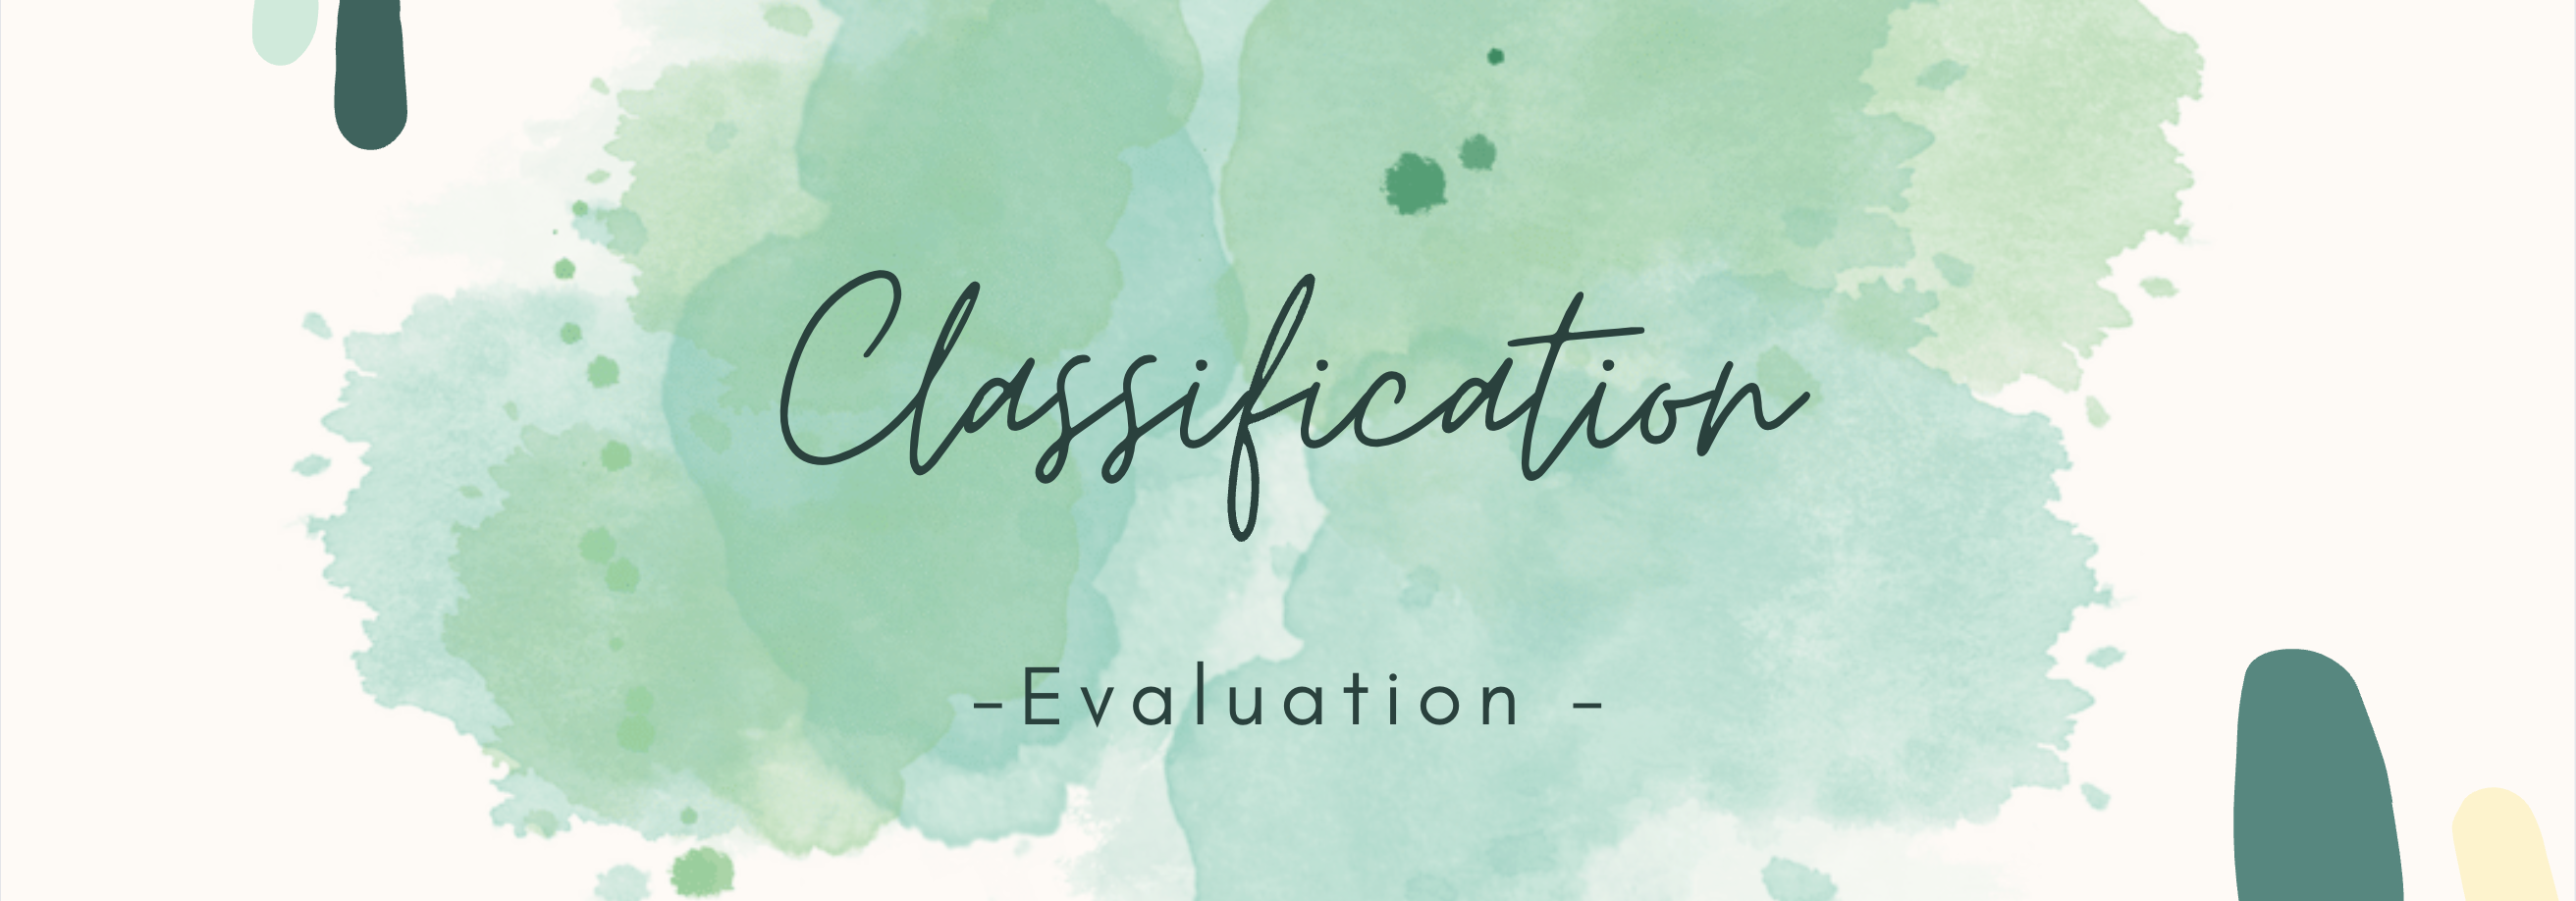</a>

# Metrics We're Focusing on Today:

## $$\mathbf{Accuracy} : \frac{(TP + TN)}{(TP + TN + FP + FN)}$$
    
- Easy to understand
- Can be misleading when working with imbalanced class problems
- Does not matter what your "positive" is... b/c the numerator is TP + TN.
   
  
## $$\mathbf{Precision} : \frac{TP}{(TP + FP)}$$
- Use when FP is more costly than FN
- e.g. spam filter

    
## $$\mathbf{Recall} : \frac{TP}{(TP + FN)}$$
- Use when FN is more costly than FP
- e.g. credit card fraud detection
<br>
<br>
<br>

### What do you care about?
- Minimizing false positives --> Precision
- Minimizing false negatives --> Recall
- Both Precision and Recall --> F1 score




___
## Examples:

Imagine you're bringing coffee to meeting, and you need to predict whether each person at the meeting will want a coffee or not. Which metric should you choose? It depends


Outcomes:

- TP: Buy coffee b'c they want coffee.
- TN: Don't buy coffee b'c they didn't want it/won't drink it.
- FP: Buy coffee, but they didn't want it.
- FN: Don't buy coffee, they did want it.

___
Scenarios

### Revolucion: really good coffee, but pricey
- Cost of FP is higher than the FN
- Precision is better here b'c buying a cup of coffee for someone who won't drink it is $$$$.
- We want to be sure about our positive predictions

### Gas Station: bad coffee, but cheap ¯\_(ツ)_/¯
- Cost of FN is higher than a FP
- Recall b'c the coffee is cheap, it's not bad to but a cheap coffee for someone who won't drink it. It's worse to not get someone coffee that they wanted.

### Meeting with super important client
- Cost of FN is higer, b'c they might be offended taht we didn't get them coffee.
- cost of FN == not signing a contract
- RECALL

What if we just don't buy coffee or buy coffee for everyone? 

___
#### Confusion Matrix
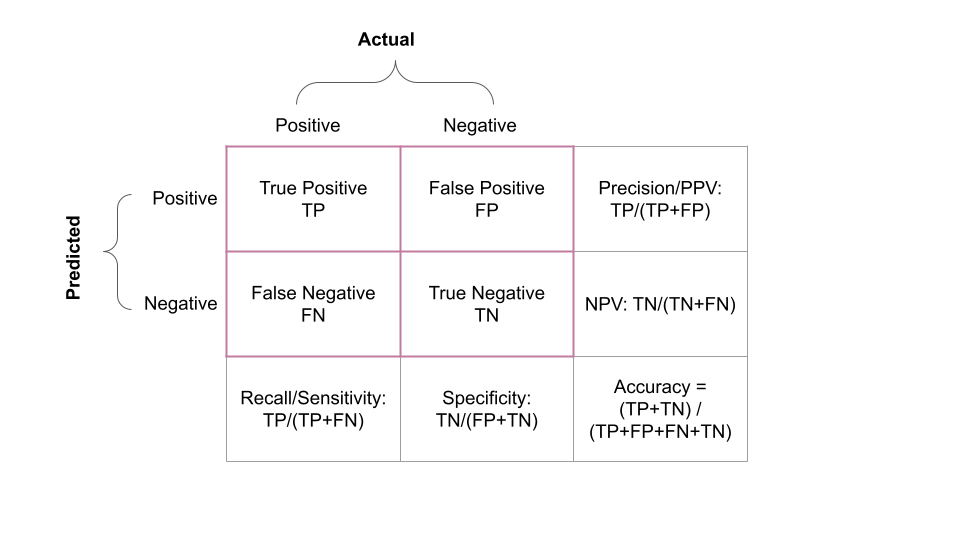

___
### Mini Exercise

Scenario: Build a classifier to predict whether a given face should unlock the iPhone.

- **What is the positive and negative case?**
     - (+): Face should unlock the phone
     - (-): Face should NOT unlock the phone
     
- **What are the possible outcomes?**
    - TP: We predict the face should unlock the phone, and the actual is that the face that should unlock the phone.
    - TN: We predict the face should not unlock the phone, and the actual is the face should not unlock the phone.
    - FP: We predict the face should unlock the phone, and the actual is that the face should NOT unlock the phone.
    - FN: We predict the face should not unlock the phone, and the actual is that the face should unlock the phone.

- **What are the costs of the outcomes?**
    - FP: Inappropriate phone access granted - bad bad bad
    - FN: Annoying - no phone access.
    
- **Which metric should we use?**
    - Precision

Scenario: Predict whether an email is spam or not. Emails marked as spam skip the inbox and go to the spam folder.

- **What is the positive and negative case?**
    - (+): Email is spam.
    - (-): Email is not spam.
- **What are the possible outcomes?**
    - TP: Predict email is spam; and email is spam.
    - TN: Predict email is not spam; and email is not spam.
    - FP: Predict email is spam; and email is not spam.
    - FN: Predict email is not spam; and email is spam.
- **What are the costs of the outcomes?**
    - FP: We took a legit email and dumped it in the spam folder.
    - FN: We let spam in the inbox.
    
- **Which metric should we use?**
    - Precision
    - f1 Score

Scenario: Predict whether an email is a phishing attempt. When we predict positive, show an additional banner warning the user that this might be a phishing email.

- **What is the positive and negative case?**
    - (+): Email is a phishing attempt
    - (-): Email is not a phishing attempt
- **What are the possible outcomes?**
    - TP: Predict email is phishing attempt, and it is.
    - TN: Predict email is not phishing attempt, and it is not.
    - FP: Predict email is phishing attempt, and it is not.
    - FN: Predict email is not phishing attempt, and it is.
- **What are the costs of the outcomes?**
    - FP: We give a banner on a innocent email.
    - FN: We fail to put a banner on a phishing attempt.
- **Which metric should we use?**
    - Recall

In [1]:
import pandas as pd

In [2]:
df = pd.DataFrame({
    'actual': ['coffee', 'no coffee', 'no coffee', 'coffee', 'coffee', 'coffee', 'no coffee', 'coffee'],
    'prediction': ['no coffee', 'no coffee', 'coffee', 'coffee', 'coffee', 'coffee', 'no coffee', 'no coffee'],
})
df

actual prediction
0     coffee  no coffee
1  no coffee  no coffee
2  no coffee     coffee
3     coffee     coffee
4     coffee     coffee
5     coffee     coffee
6  no coffee  no coffee
7     coffee  no coffee

# Coffee: Confusion Matrix

In [5]:
#pd.crosstab(df.actual, df.prediction)
pd.crosstab(df.prediction, df.actual)

actual      coffee  no coffee
prediction                   
coffee           3          1
no coffee        2          2

 Coffee - positive (1)  
 No-Coffee - negative (0)  
 
True Positive: We predicted coffee, it actually was coffee (3)

True Negative: We predicted no coffee, it actually was NO coffee (2)

False Positive: We predicted coffee, it actually was  NO coffee (1) : (**Type I Error**)

False Negative: We predicted no coffee, it actually was coffee (2): (**Type II Error**)

In [8]:
(3) / (3+2)

0.6

- **accuracy**: (TP + TN) / (TP + TN + FP + FN)
    - (3+2) / (3+2+1+2) = 62.5%

  
- **precision**: TP / (TP + FP)
    - (3) / (3+1) = 75%
   
   
- **recall**: TP / (TP + FN)
    - (3) / (3+2) = 60%
   

# Calculate Metrics manually using Pandas

In [9]:
# Which label (actual) appears most frequently in our dataset?
df.actual.value_counts()

coffee       5
no coffee    3
Name: actual, dtype: int64

In [10]:
# create a new column called 'baseline_prediction'
# which is the most frequent label

df['baseline_prediction'] = 'coffee'

In [11]:
df

actual prediction baseline_prediction
0     coffee  no coffee              coffee
1  no coffee  no coffee              coffee
2  no coffee     coffee              coffee
3     coffee     coffee              coffee
4     coffee     coffee              coffee
5     coffee     coffee              coffee
6  no coffee  no coffee              coffee
7     coffee  no coffee              coffee

In [12]:
#Accuracy
(df.actual == df.prediction).mean()

0.625

In [14]:
# Model and baseline accuracy:
model_accuracy = (df.actual == df.prediction).mean()
baseline_accuracy = (df.actual == df.baseline_prediction).mean()

In [15]:
print(model_accuracy, baseline_accuracy)

0.625 0.625


In [16]:
# Let's house our metrics in a df to later compare
metric_df = pd.DataFrame(data = [
    {'metric': 'accuracy',
    'model': model_accuracy,
    'baseline': baseline_accuracy}
]
)

In [17]:
metric_df

metric  model  baseline
0  accuracy  0.625     0.625

In [18]:
# Recall - calculate on subset of data
# only look at subset of actual positives (i.e actual == coffee)
subset = df[df.actual == 'coffee']
subset

actual prediction baseline_prediction
0  coffee  no coffee              coffee
3  coffee     coffee              coffee
4  coffee     coffee              coffee
5  coffee     coffee              coffee
7  coffee  no coffee              coffee

In [19]:
(subset.actual == subset.prediction).mean()

0.6

In [20]:
# calculate recall for model and baseline
model_recall = (subset.actual == subset.prediction).mean()
baseline_recall = (subset.actual == subset.baseline_prediction).mean()

In [21]:
#Append this to the metric_df
dict1 = pd.DataFrame({'metric': 'recall',
                     'model': model_recall,
                     'baseline': baseline_recall}, index=[0])

In [22]:
dict1

metric  model  baseline
0  recall    0.6       1.0

In [23]:
metric_df = pd.concat([metric_df, dict1], ignore_index=True)

In [24]:
metric_df

metric  model  baseline
0  accuracy  0.625     0.625
1    recall  0.600     1.000

In [25]:
# Precision: # only look at the subset where we made positive prediction
# (i.e. prediction == 'coffee')

subset = df[df.prediction == 'coffee']
subset

actual prediction baseline_prediction
2  no coffee     coffee              coffee
3     coffee     coffee              coffee
4     coffee     coffee              coffee
5     coffee     coffee              coffee

In [26]:
(subset.actual == subset.prediction).mean()

0.75

In [32]:
model_precision = (subset.actual == subset.prediction).mean()

In [28]:
# Baseline Precision: # only look at the subset where we made positive prediction for baseline
# (i.e. baseline prediction == 'coffee')

subset = df[df.baseline_prediction == 'coffee']

In [31]:
baseline_precision = (subset.actual == subset.baseline_prediction).mean()

In [33]:
#Append this to the metric_df
dict2 = pd.DataFrame({'metric': 'precision',
                     'model': model_precision,
                     'baseline': baseline_precision}, index=[0])

In [34]:
metric_df = pd.concat([metric_df, dict2], ignore_index=True)

In [35]:
metric_df

metric  model  baseline
0   accuracy  0.625     0.625
1     recall  0.600     1.000
2  precision  0.625     0.625

## Additional classification Metrics 

###  F-1 score 

- F1 score is the harmonic mean of precision and recall


$$ \text{F-1 score} = \frac{\text{2 * Precision * Recall}}{\text{Precision + Recall}} $$


- We want to a have high F1 score. This means we want both Precision and Recall to be high.

- Harmonic mean punishes the extreme values more i.e. to have high F1 score, it ensures that both precision and recall are high.


###  Area Under ROC Curve:
History:  During World War II, the US army wanted to improve the ability to detect enemy objects on battlefields. Among all initiatives, the ROC (Receiver Operating Characteristic) curve was developed to measure the ability of a radar receiver operator to correctly identify Japanese aircraft based on radar signal.
-  How well a model can classify binary outcomes
- A way to measure overall model performance for models that predict not just a class, but a probability as well.



### What does shape/AUC of ROC curve signifies ?
- The shape of an ROC curve changes when a model changes the way it classifies the two outcomes.

- The area measures *discrimination*. The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.
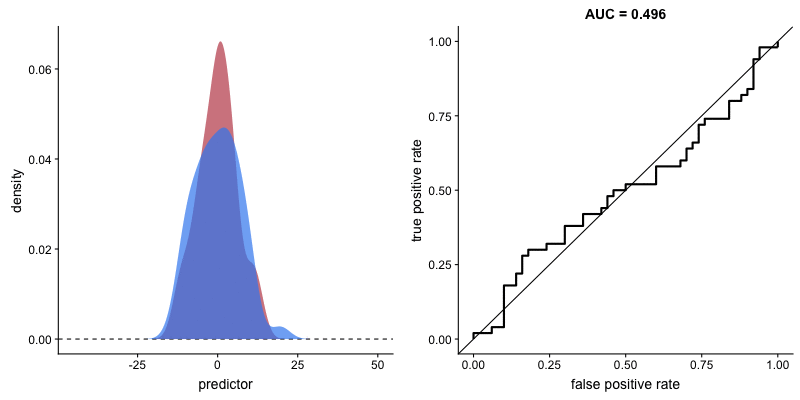

Animations source: https://github.com/dariyasydykova/open_projects/blob/master/ROC_animation/animations/ROC.gif

___
# Metrics using Sklearn 

In [36]:
# import sklearn functions
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

In [37]:
df

actual prediction baseline_prediction
0     coffee  no coffee              coffee
1  no coffee  no coffee              coffee
2  no coffee     coffee              coffee
3     coffee     coffee              coffee
4     coffee     coffee              coffee
5     coffee     coffee              coffee
6  no coffee  no coffee              coffee
7     coffee  no coffee              coffee

In [38]:
y_actual = df.actual
y_pred = df.prediction

In [39]:
# Accuracy score in SKlearn
accuracy_score(y_actual, y_pred)

0.625

In [41]:
# Recall score in SKlearn
recall_score(y_actual, y_pred,
            labels=['no coffee', 'coffee'],
             average= None)

array([0.66666667, 0.6       ])

In [42]:
# Recall score in SKlearn
recall_score(y_actual, y_pred,
            labels=['coffee', 'no coffee'],
             average= None)

array([0.6       , 0.66666667])

In [43]:
# Precision score in SKlearn
precision_score(y_actual, y_pred,
               labels=['no coffee', 'coffee'],
               average= None)

array([0.5 , 0.75])

In [44]:
# Classification report
print(classification_report(y_actual, y_pred, labels=['no coffee', 'coffee']))

              precision    recall  f1-score   support

   no coffee       0.50      0.67      0.57         3
      coffee       0.75      0.60      0.67         5

    accuracy                           0.62         8
   macro avg       0.62      0.63      0.62         8
weighted avg       0.66      0.62      0.63         8



### Bonus: Recognize Metric

You are a data-scientist at a bio-medical start-up company and working on developing rapid COVID test-kit. The test relies on number of inputs (e.g. patient's age, body temperature, BMI, symptoms along with some results from blood analysis) to make a prediction if patient is recently infected with coronavirus.

You demo your technology/test to FDA in hope of getting approval to sell the kits to general public. FDA asks you the following questions to assses your test-kit:

- "What is the probability that your test-kit will show positive result, if the patient is actually infected?"
- "If a patient tested positive using your test-kit, what is the probability that the patient is  actually infected?"
- "How good is your test in actually ruling out the infection. In other words, what is the probability that your test-kit will show negative result, if the patient is actually not infected?"


**What metrics will you use to answer these questions?**
